<a href="https://colab.research.google.com/github/pranav-2410/Project-ML/blob/master/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION:**

**Exploratory Data Analysis**:

EDA -  It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we understand the problem better and try to uncover hidden insights



Here, we will explore the power of EDA using a dataset. The dataset is on cars and its prices,horse power, cylinders etc and perform Exploratory data
analysis on how the different features of a car and its price are related.

#**1**. Importing the required libraries :


In [113]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1**.1  **Importing the Dataset into data**





In [114]:
#to import the dataset which is csv format, we use read_csv("file_name.csv")
 
data = pd.read_csv("data.csv")

In [115]:
#to display the top 5 rows we use head() function

data.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [116]:
#to display the bottom 5 rows we use tail() function
data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1**.2 **Checking the DataTypes and Basic Summary Statistics**

In [117]:
#getting information about the columns regarding the dtypes and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [118]:
#checking the datatypes 

data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [119]:
#statistical summary

data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**1**.3 **Knowing the Shape of the DataSet**

In [120]:
#checking the shape 

data.shape

(11914, 16)

**1**.4 **Checking for Null values**

In [121]:
#null values are found 

data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

#**2** Dropping the less **Relevant columns**:

In [122]:
#Market Category column can be dropped, as there is insufficiant data i.e having many null values
 
data.drop(['Market Category','Number of Doors'],axis=1,inplace=True)

In [123]:
#dataset after dropping 
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [124]:
#shape of the dataset after dropping market category

data.shape

(11914, 14)

#**3**  **Renaming** the columns :




In [125]:
#renaming can to done using rename() function
#renaming is done to
data.rename(columns= {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission",
                      "Driven_Wheels": "Drive Mode", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"}, inplace= True)

data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#**4**.   **Checking** and dropping of **Duplicate Rows** and **Null Values** :

In [126]:
#to get the shape of duplicated data
duplicatedRows = data[data.duplicated()]
duplicatedRows.shape

(721, 14)

In [127]:
#the total number of duplicate rows can be known using duplicated() function
data.duplicated().sum()


721

**4**.1 **Dropping the Duplicated Rows**

In [128]:
#shape of dataset before dropping the duplicates
data.shape

(11914, 14)

In [129]:
#dropping the duplicate rows
data=data.drop_duplicates()

data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [130]:
#shape of dataset after dropping the duplicates
data.shape

(11193, 14)

**4**.2 **Checking for Null Values and  Missing Values** 

In [131]:
#to know the null or missing data we use the function isnull()
data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

````
As there are only few number of missing data, we could drop the missing data
````

**4**.3 **Dropping of  Missing Data** 

In [132]:
#shape of the dataset before dropping the missing values
data.shape

(11193, 14)

In [133]:
#to drop the missing or null values we use 
data = data.dropna()


In [134]:
#shape of the dataset after dropping the missing data
data.shape

(11092, 14)

In [135]:
#checking the number of missing values
data.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

#**5**. Plotting **Graphs** for various columns   to check for **Outliers**:


>An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error.

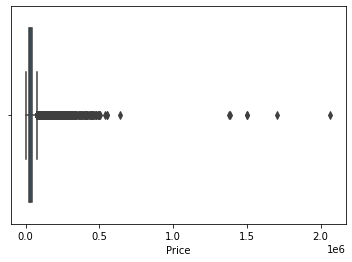

In [136]:
sns.boxplot(x= data["Price"])


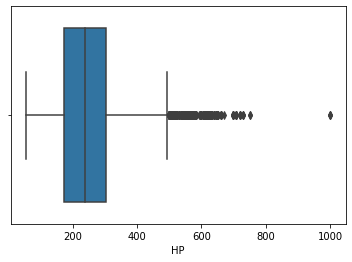

In [137]:
sns.boxplot(x=data["HP"])

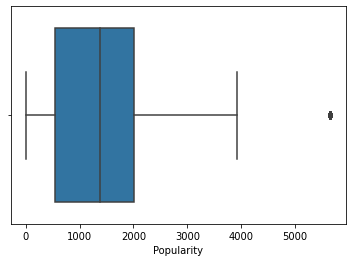

In [138]:
sns.boxplot(x=data["Popularity"])             #the number of outliers here are less


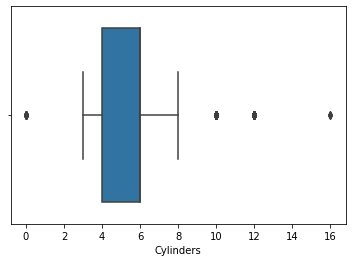

In [139]:
sns.boxplot(x=data["Cylinders"])

**5**.1 **Removing** **the** **Outliers**

```
>The outliers can be removed using Inter Quartile Range(IQR)

```

In [140]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1               
IQR

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21491.25
dtype: float64


>For finding out the Outlier using IQR we have to define a multiplier
 which is 1.5 ideally that will decide how far below Q1 and above Q3 will be considered as an Outlier
 
 >Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier
 

In [141]:
#shape of dataset before removing the outliers
data.shape

(11092, 14)

In [142]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

#shape of dataset after removing the outliers
data.shape

(8608, 14)

#**6**. Most **Represented**  and the **Average Price** of Car Brand:


**6**.1 **Most Represented Car Brands**

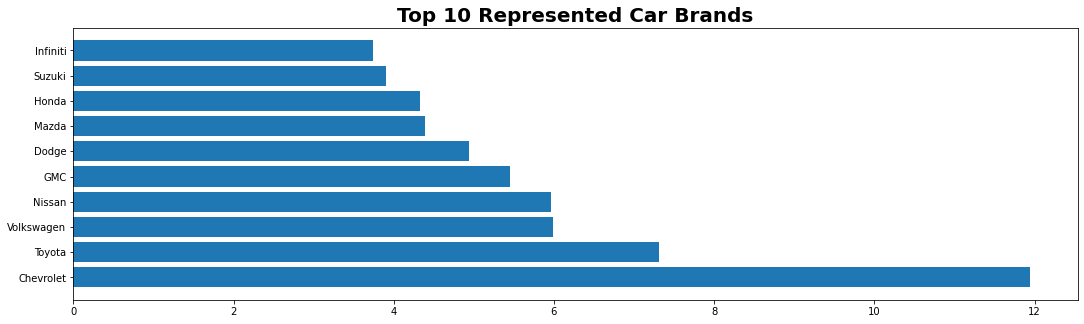

In [143]:
# Percentage of car per brand
counts = data['Make'].value_counts()*100/sum(data['Make'].value_counts())

# Top 10 car brands
top_brands = counts.index[:10]
    
# Plotting
plt.figure(figsize=(18,5))                                  	                       #we adjust the graph size according to our convience, as done
plt.barh(top_brands,width=counts[:10])   
plt.title('Top 10 Represented Car Brands', weight= 'bold', fontsize= 20)             #we give the title of the graph as "Top 10 Represented car brands"
plt.show()                         

From the graph, it is clearly given the top 10 car brands



**6**.2 **Average Price among the top car brands**

In [144]:
avgPrices = data[['Make','Price']].loc[                                    #The loc() function is used to access a group of rows and columns using label's
               (data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Nissan')|
               (data['Make'] == 'GMC')|
               (data['Make'] == 'Dodge')|
               (data['Make'] == 'Mazda')|
               (data['Make'] == 'Honda')|
               (data['Make'] == 'Suzuki')|
               (data['Make'] == 'infiniti')].groupby('Make').mean()       #groupby() function is used to split the data into groups  
                                                                          #To get the mean or average of the data we use mean() function
print(avgPrices)

                   Price
Make                    
Chevrolet   28188.626459
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18164.098214
Toyota      29011.750397
Volkswagen  29032.817476


# **7**.  Plotting of **Correlation Matrix** :

>A correlation matrix is a table showing **correlation coefficients** between variables. Each cell in the table shows the correlation between **two variables**

In [145]:
#We use corr() function to get the correlation matrix for the datset

data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330540,-0.094397,0.359829,0.323613,0.204453,0.591644
HP,0.330540,1.000000,0.741031,-0.465311,-0.563362,0.105691,0.743497
Cylinders,-0.094397,0.741031,1.000000,-0.697884,-0.750850,0.025803,0.392174
MPG-H,0.359829,-0.465311,-0.697884,1.000000,0.937936,0.080857,-0.127772
MPG-C,0.323613,-0.563362,-0.750850,0.937936,1.000000,0.070320,-0.202410
Popularity,0.204453,0.105691,0.025803,0.080857,0.070320,1.000000,0.116684
Price,0.591644,0.743497,0.392174,-0.127772,-0.202410,0.116684,1.000000


**Analysing the correlation matrix**:



1.   **HIGH CORRELATION:** 
                       Cylinders     &   Horse Power
                       Price         &   Horse Power
                       Highway MPG   &   City MPG
                       


2.   **HIGH ANTICORRELATION**
                      Cylinders   &    City MPG
                      Horse Power &    Highway MPG

                       



>As the number of **Cylinders** increases, the **Horse Power** of the car increases
And beacuse of this the **Price** also increases.
By this we can  conclude that **Cylinders** and **Price** are also in correlation

>As the **Cylinders** increases, the fuel counsumed per mile i.e **MPG**  decreases

There are different ways for visualizing a correlation matrix  :

1.   Heatmap
2.   Scatter plots


**Heatmap**

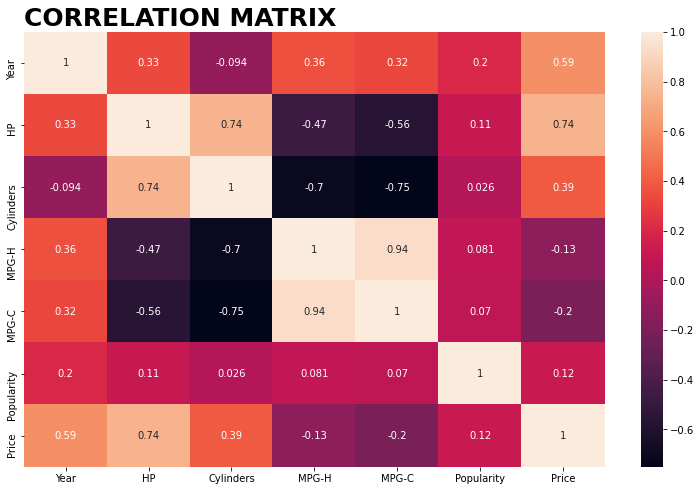

In [146]:
corrMatrix = data.corr()
plt.subplots(figsize = (13,8))                                                    #setting up the size
sns.heatmap(corrMatrix, annot=True)                                              
plt.title("CORRELATION MATRIX", weight = 'bold', fontsize= 25, loc= 'left' )      #giving title to the plot
plt.show()

# **8**. Plotting Graphs :

**Scatter Plot**

>A scatter plot is a diagram where each value in the data set is represented by a dot .Scatter plots are used to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price 



Text(0.0, 1.0, 'SCATTER PLOT ')

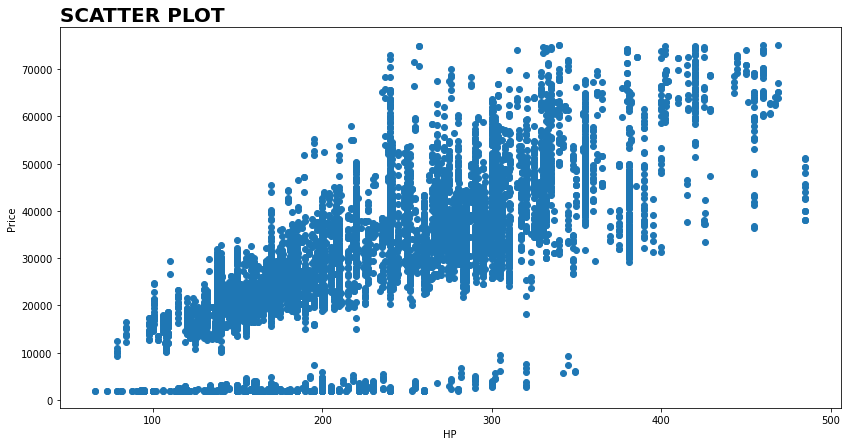

In [147]:
#scatter plotted between Horse Power and Price

plt.subplots(figsize=(14,7))
plt.scatter(data['HP'],  data['Price'])
plt.xlabel('HP')
plt.ylabel('Price')
plt.title("SCATTER PLOT ", weight= 'bold', fontsize=20, loc='left')


> It is clearly seen that, as the Horse Power increases the Price of the car also increases

**BAR GRAPHS**

>Bar graphs are easy to understand even by the common people, and that is main motive. So Bar graphs are most desired type

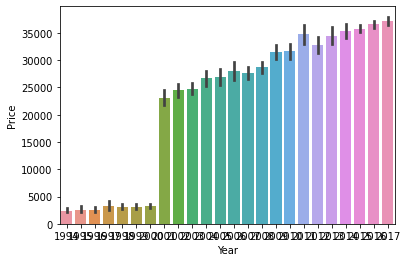

In [148]:
#bar graph plotted between  Year and  Price
sns.barplot(data['Year'], data['Price'])

>It is clear that, the cost of cars is increasing as time passes
i.e The Price increases as Years is passing

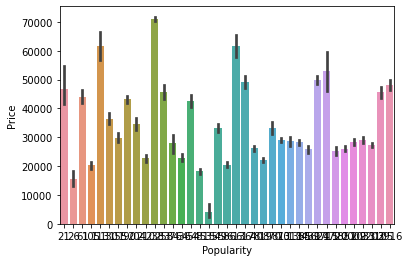

In [149]:
#plot between Popularity and Price

sns.barplot(data['Popularity'], data['Price'])

>Here there is variation in the trend , and there is little correlation between Popularity and Price

In [150]:
#Creating a price range:

#A new column by name price range is created
data['price_range'] = pd.cut(data['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)     #setting the range
data['price_range'] = data['price_range'].astype(object)

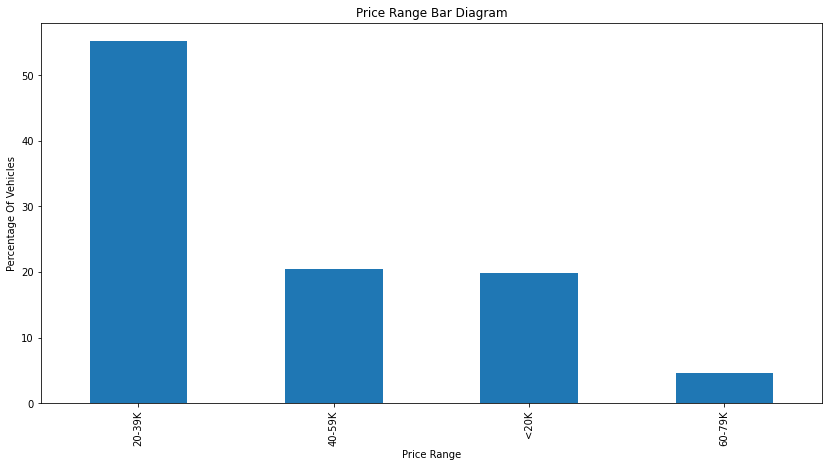

In [151]:
(data['price_range'].value_counts() / len(data) *100).plot.bar(figsize=(14,7))
plt.title("Price Range Bar Diagram")
plt.ylabel('Percentage Of Vehicles')
plt.xlabel('Price Range');

In [152]:
data.drop(['price_range'],axis=1,inplace=True)

**LINE PLOTS**

>Line graphs can give a quick analysis of data. You're able to quickly tell the range, minimum/maximum. 

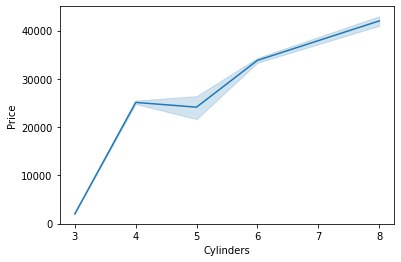

In [153]:
#line graph between Cylinders and Price

sns.lineplot(data['Cylinders'], data['Price'])

>Here also there is an increasing trend seen, as the cylinders increases the is an increase in the Price of the car

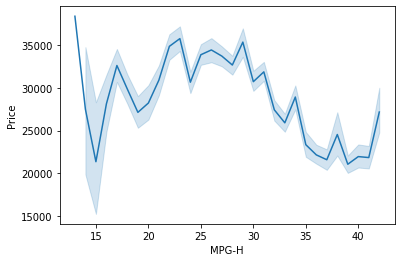

In [154]:
#plot between MPG-H	and Price

sns.lineplot(data['MPG-H'], data['Price'])

>Here, we see a lot of variation in the trend, and there is a decrease in the Price as there is an increase in the Highway MPG

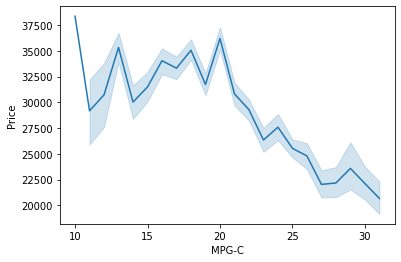

In [155]:
#plot between MPG-C	and Price

sns.lineplot(data['MPG-C'], data['Price'])

>Here we can see a negative trend i.e as the City MPG increases the Price decreases

**CONCLUSION:**
> Price of the car increases when:
              
              1. Horse Power increases.                          
              2. As Years are passing.
              3. Cylinders increases.
              4. Highway and City MPG decreases.
                      




# **9**. Building a Machine Learning Model:

In [156]:
#importing the required libraries 
from sklearn.preprocessing import StandardScaler            #It basically helps to normalise the data within a particular range

from sklearn.model_selection import train_test_split        #It is used to splot the data into train and test set     

from sklearn.preprocessing import LabelEncoder              #It can also be used to transform non-numerical labels to numerical labels

from sklearn.preprocessing import OneHotEncoder             #Used to Encode categorical features as a one-hot numeric array

from sklearn.linear_model import LinearRegression           #It is used to perform the regression task

from sklearn import metrics                                 #It is used for analysing the result parameter

**Encoading:**

>Categorical data that needs to be encoded is converted into Numerical type by using LabelEncoder.

In [157]:
 enc= data.select_dtypes(exclude=[np.number]).columns
enc

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission', 'Drive Mode',
       'Vehicle Size', 'Vehicle Style'],
      dtype='object')

In [158]:
label_encoder = LabelEncoder()
for i in enc:
  data[i] = label_encoder.fit_transform(data[i])

data.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,6,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,6,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,6,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,6,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,6,230.0,6.0,2,3,0,6,28,18,3916,34500


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              8608 non-null   int64  
 1   Model             8608 non-null   int64  
 2   Year              8608 non-null   int64  
 3   Engine Fuel Type  8608 non-null   int64  
 4   HP                8608 non-null   float64
 5   Cylinders         8608 non-null   float64
 6   Transmission      8608 non-null   int64  
 7   Drive Mode        8608 non-null   int64  
 8   Vehicle Size      8608 non-null   int64  
 9   Vehicle Style     8608 non-null   int64  
 10  MPG-H             8608 non-null   int64  
 11  MPG-C             8608 non-null   int64  
 12  Popularity        8608 non-null   int64  
 13  Price             8608 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 1.3 MB


In [160]:
X = data[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C',
          'Vehicle Style','Vehicle Size','Drive Mode', 'Transmission','Engine Fuel Type','Model','Make' ]].values
y = data['Price'].values

>**Feature Scaling** is a technique to standardize the independent features present in the data in a fixed range

In [161]:
# Feature Scaling:

std_X = StandardScaler()                           #StandardScaler() function Standardize features by removing the mean and scaling to unit variance
std_y = StandardScaler()
X = std_X.fit_transform(X)                         
y = std_y.fit_transform(y.reshape(-1,1))   
       

**9**.1 **Splitting The Data:**
>We separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing

In [162]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size= 0.2, random_state= 0 )       #test size is taken as 20%

print(X_train.shape, y_train.shape)                                           #checking the shape of training and testing set         
print(X_test.shape, y_test.shape)                      

(6886, 13) (6886, 1)
(1722, 13) (1722, 1)


**9**.2 **Building a Machine Learning Model:**

>If response variable is affected by more than one predictor variable, for such cases, the Multiple Linear Regression algorithm is used. Here the Price is effected by many other variables like HP, Cylinders....etc

In [163]:
#Fitting Multiple Linear Regression to the Training set
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

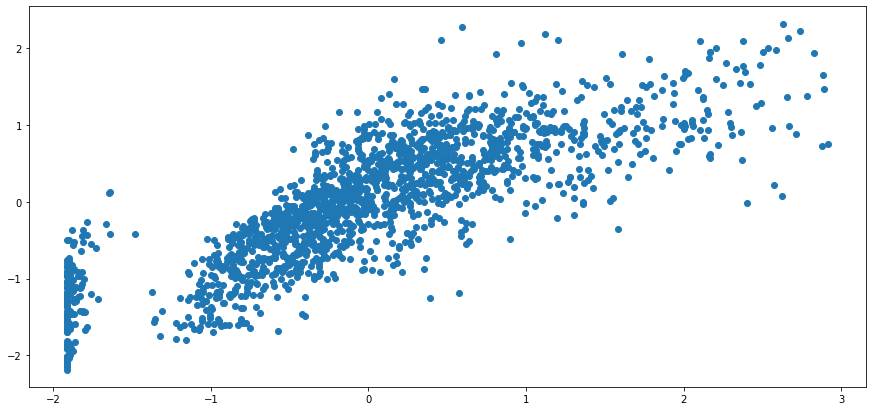

In [164]:
# Predicting the Test set results
y_pred = model.predict(X_test)
fig,ax = plt.subplots(figsize=(15,7))
plt.scatter(y_test,y_pred)            #plotting graph between the test set and predicted set


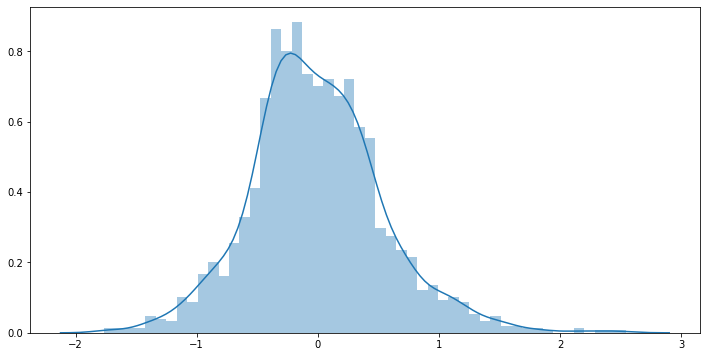

In [165]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(y_test - y_pred, bins=50)

>R-Squared value helps us to predict how effective out algorithm is.
R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

In [166]:
#Analysing the result parameter

print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2 Score: 0.6798953801128838
Mean Absolute Error: 0.4238319831896466
Mean Squared Error: 0.303908348139464
Root Mean Squared Error: 0.5512788297581034


# **10**. Spot Checking Algorithms:

**10**.1 **Decision Tree Regression:**
>Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output

In [167]:
from sklearn.tree import DecisionTreeRegressor            #importing libraries

regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)                            #Fitting Decision Tree Regression to the data set

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [168]:
#making new prediction with Decision Tree Regression
y_pred = regressor.predict(X_test)
y_pred

array([-0.52291026,  1.35472859,  0.24899327, ...,  0.95360265,
       -1.01250821, -1.02266831])

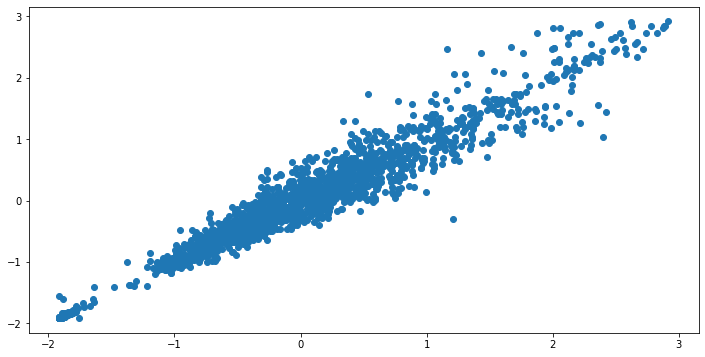

In [169]:
#visualising the result using scatterplot
plt.subplots(figsize=(12,6))
plt.scatter(y_test, y_pred)

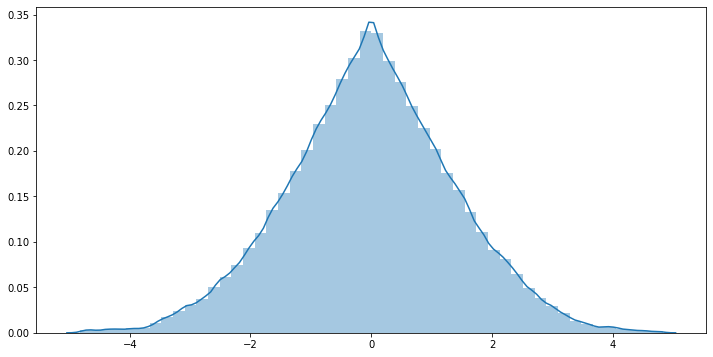

In [170]:
plt.subplots(figsize=(12,6))
sns.distplot(y_test-y_pred, bins= 50)

In [171]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2 Score: 0.9361282197947763
Mean Absolute Error: 0.17236894814817733
Mean Squared Error: 0.06064007205438563
Root Mean Squared Error: 0.24625204984808885


>Here by using Decision Tree, we can see a good improvement in the R- square value.

**10**.2 **Random Forest Regression**

>It is made up of many Decision Trees i.e it is an ensemble of Decision Trees

In [172]:
from sklearn.ensemble import RandomForestRegressor        #importing the libraries

regressor = RandomForestRegressor()                       
regressor.fit(X_train, y_train)                           #Fitting Random Forest Regression to the data set  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [173]:
#Making new prediction with random forest regression
y_pred = regressor.predict(X_test)
y_pred

array([-0.45842445,  1.50610789,  0.24139189, ...,  0.81238562,
       -1.01378086, -1.04800016])

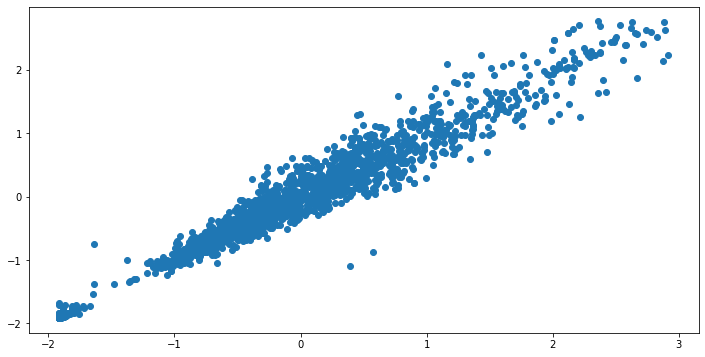

In [174]:
#Visualising using scatterplot
plt.subplots(figsize=(12,6))                      
plt.scatter(y_test,y_pred)

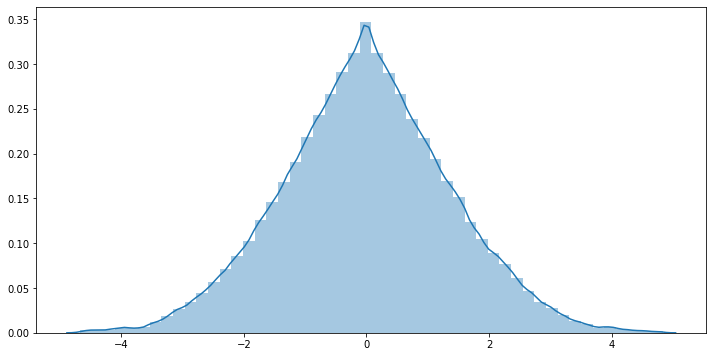

In [175]:
plt.subplots(figsize=(12,6))
sns.distplot(y_test-y_pred, bins = 50)

In [176]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2 Score: 0.9449177679324402
Mean Absolute Error: 0.1641034740248648
Mean Squared Error: 0.05229524698953105
Root Mean Squared Error: 0.22868154055264506


>By doing Random Forest we can see a slight increase in the R-square score when compared to Decession tree

**10**.3 **K-Nearest Neighbors**
>The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.


In [177]:
from sklearn import neighbors
rmse_val = []                                                        #to store rmse values for different k
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)                                      #fit the model
    y_pred=model.predict(X_test)                                     #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))       #calculate rmse
    rmse_val.append(error)                                           #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.30020190650626727
RMSE value for k=  2 is: 0.2873153599360304
RMSE value for k=  3 is: 0.2874022854724297
RMSE value for k=  4 is: 0.29761262391219445
RMSE value for k=  5 is: 0.3036255433084669
RMSE value for k=  6 is: 0.31071273880948114
RMSE value for k=  7 is: 0.3239718706604873
RMSE value for k=  8 is: 0.3372040389117077
RMSE value for k=  9 is: 0.34646265634911944
RMSE value for k=  10 is: 0.3553027493755336
RMSE value for k=  11 is: 0.36631446815598206
RMSE value for k=  12 is: 0.3761717657608661
RMSE value for k=  13 is: 0.38333445496707924
RMSE value for k=  14 is: 0.3907987484054997
RMSE value for k=  15 is: 0.3961052604918853


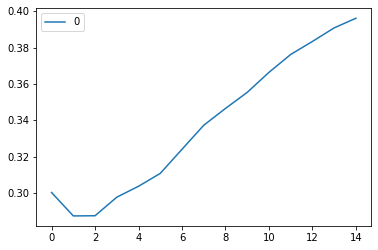

In [178]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)                #elbow curve 
curve.plot()


>The RMSE value decreases as we increase the k value. At k= 2, the RMSE is approximately 0.2873153, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case.

In [179]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2 Score: 0.8347389406470227
Mean Absolute Error: 0.2792851161187554
Mean Squared Error: 0.15689937738934434
Root Mean Squared Error: 0.3961052604918853


>Using K-NN the R-Square value is fair, but it is lower than that of Random Forest

**10**.4  **Support Vector Machine - Regression (SVR)**:
>SVM works relatively well when there is clear margin of separation between classes.
SVM is more effective in high dimensional spaces.

In [180]:
#importing the libraries 
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
#Predicting a new result
y_pred = regressor.predict(X_test)
y_pred

array([-0.29238426,  1.71657146,  0.1035014 , ...,  0.87131092,
       -1.17346361, -0.98298458])

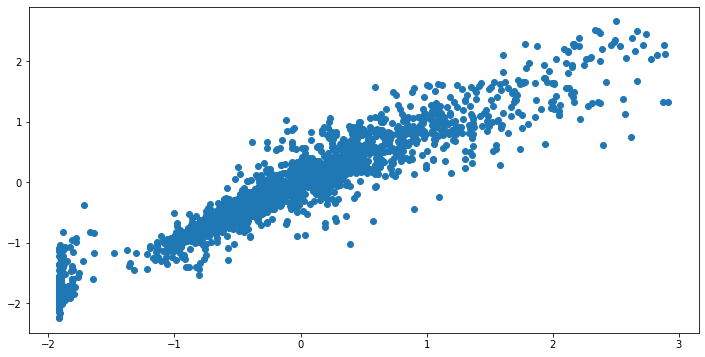

In [182]:
#Visualising using scatterplot
plt.subplots(figsize=(12,6))                      
plt.scatter(y_test,y_pred)

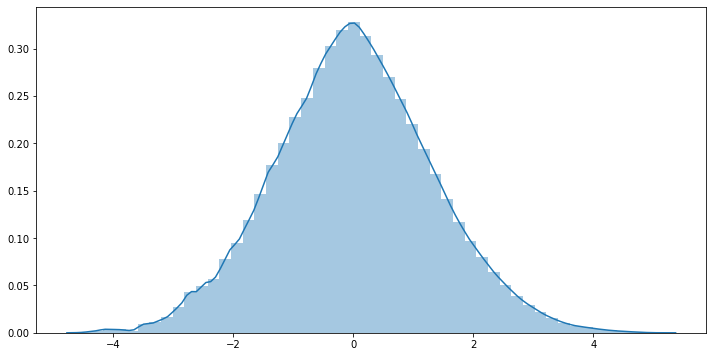

In [183]:
plt.subplots(figsize=(12,6))
sns.distplot(y_test-y_pred, bins= 50)

In [184]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2 Score: 0.8837541313119542
Mean Absolute Error: 0.23299115693944455
Mean Squared Error: 0.11036419887810223
Root Mean Squared Error: 0.3322110757908325


>The R-Square value of SVM algorithum is slightly better than K-NN algorithm

**INSIGHTS:**

>R-squared is always between 0 and 100%:

>0% indicates that the model explains none of the variability of the response data around its mean.
>100% indicates that the model explains all the variability of the response data around its mean.

>In general, the higher the R-squared, the better the model fits your data

>After trying some algorithms, we have observed that, **Random Forest** has given better results when compared with the other algorithms and it best fits the data